In [1]:
import json
import numpy
from pandas.io.json import json_normalize
from time import time
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as sp
from plotly import figure_factory as ff
import itertools

In [2]:
df_user=pd.read_csv("yelp_academic_dataset_user.csv",encoding='latin-1') 

In [3]:
df_rating=pd.read_csv("basic_rating_table.csv",encoding='latin-1') 

In [111]:
df_rating=pd.read_csv("CA_rating_table.csv",encoding='latin-1')

# Classify Reviews and users

In [4]:
def filter_user(df,n,m):
    return df[(df['review_count']>n )&(df['review_count']<m)]

In [39]:
def label_review(row):
    if abs(row['delta'])<1.5: 
        return 0
    else:
        return 1

In [6]:
def cal_ct_ratio(row):
    return sum(row.review_attribute)/len(row.review_attribute)   

In [7]:
def classify_user(row,upper,lower):
    #Contrarian
    if row.ct_ratio>upper:
        return 1
    #Trend follower
    if row.ct_ratio<lower:
        return 0
    #Random
    else:
        return 2

In [91]:
df_rating_1=df_rating[['user_id','delta','date','stars','cumcount','cum_rating']]
df_rating_1=df_rating_1.reset_index()
del df_rating_1['index']
#Delete reviews that are the first to businesses
df_rating_1=df_rating_1.drop(df_rating_1[df_rating_1['cumcount']<2].index)
df_user_class=df_rating_1.groupby('user_id')['delta'].apply(list)
df_user_class=df_user_class.reset_index()
df_user_class['review_count']=df_user_class['delta'].map(len)

In [92]:
df_rating_1['review_attribute']=df_rating_1.apply(lambda row: label_review(row),axis=1)

In [93]:
df_user_class=df_rating_1.groupby('user_id')['review_attribute'].apply(list)
df_user_class=df_user_class.reset_index()
df_user_class['review_count']=df_user_class['review_attribute'].map(len)

In [94]:
df_user_class['ct_ratio']=df_user_class.apply(lambda row: cal_ct_ratio(row),axis=1)

In [95]:
df_user_class['user_class']=df_user_class.apply(lambda row: classify_user(row,0.65,0.35),axis=1)

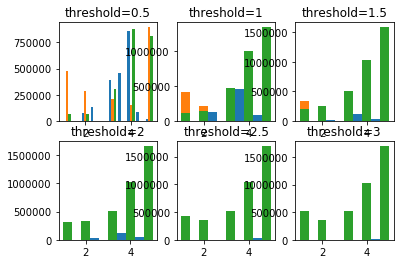

In [20]:
#Only classify reviews by 2 catagories
fig, axes = plt.subplots(nrows=2, ncols=3)
fig=plt.figure(figsize=(16,8))
# axes[0,0].hist(df_rating[abs(df_rating.delta)>0.5].cum_rating)
# axes[0,0].hist(df_rating[abs(df_rating.delta)>0.5].stars)
# axes[0,0].hist(df_rating[abs(df_rating.delta)<=0.5].stars)
x=df_rating[abs(df_rating.delta)>0.5].cum_rating
y=df_rating[abs(df_rating.delta)>0.5].stars
z=df_rating[abs(df_rating.delta)<=0.5].stars
axes[0,0].hist([x,y,z])
axes[0,0].set_title('threshold=0.5')

axes[0,1].hist(df_rating[abs(df_rating.delta)>1].cum_rating)
axes[0,1].hist(df_rating[abs(df_rating.delta)>1].stars)
axes[0,1].hist(df_rating[abs(df_rating.delta)<=1].stars)
axes[0,1].set_title('threshold=1')

axes[0,2].hist(df_rating[abs(df_rating.delta)>1.5].cum_rating)
axes[0,2].hist(df_rating[abs(df_rating.delta)>1.5].stars)
axes[0,2].hist(df_rating[abs(df_rating.delta)<=1.5].stars)
axes[0,2].set_title('threshold=1.5')

axes[1,0].hist(df_rating[abs(df_rating.delta)>2].cum_rating)
axes[1,0].hist(df_rating[abs(df_rating.delta)>2].stars)
axes[1,0].hist(df_rating[abs(df_rating.delta)<=2].stars)
axes[1,0].set_title('threshold=2')

axes[1,1].hist(df_rating[abs(df_rating.delta)>2.5].cum_rating)
axes[1,1].hist(df_rating[abs(df_rating.delta)>2.5].stars)
axes[1,1].hist(df_rating[abs(df_rating.delta)<=2.5].stars)
axes[1,1].set_title('threshold=2.5')

axes[1,2].hist(df_rating[abs(df_rating.delta)>3].cum_rating)
axes[1,2].hist(df_rating[abs(df_rating.delta)>3].stars)
axes[1,2].hist(df_rating[abs(df_rating.delta)<=3].stars)
axes[1,2].set_title('threshold=3')

#plt.tight_layout()

In [25]:
#Only classify reviews by 2 catagories
labels=['cum rating','contrarian']
fig=plt.figure(figsize=(16,8), dpi=1600)
# axes[0,0].hist(df_rating[abs(df_rating.delta)>0.5].cum_rating)
# axes[0,0].hist(df_rating[abs(df_rating.delta)>0.5].stars)
# axes[0,0].hist(df_rating[abs(df_rating.delta)<=0.5].stars)
ax1=fig.add_subplot(231)
x=df_rating[abs(df_rating.delta)>0.5].cum_rating
y=df_rating[abs(df_rating.delta)>0.5].stars
plt.hist([x,y],label=labels)
plt.title('threshold=0.5')
plt.legend()
ax1=fig.add_subplot(232)
x=df_rating[abs(df_rating.delta)>1].cum_rating
y=df_rating[abs(df_rating.delta)>1].stars
plt.hist([x,y],label=labels)
plt.title('threshold=1')
plt.legend()
ax1=fig.add_subplot(233)
x=df_rating[abs(df_rating.delta)>1.5].cum_rating
y=df_rating[abs(df_rating.delta)>1.5].stars
plt.hist([x,y],label=labels)
plt.title('threshold=1.5')
plt.legend()
ax1=fig.add_subplot(234)
x=df_rating[abs(df_rating.delta)>2].cum_rating
y=df_rating[abs(df_rating.delta)>2].stars
plt.hist([x,y],label=labels)
plt.title('threshold=2')
plt.legend()
ax1=fig.add_subplot(235)
x=df_rating[abs(df_rating.delta)>2.5].cum_rating
y=df_rating[abs(df_rating.delta)>2.5].stars
plt.hist([x,y],label=labels)
plt.legend()
plt.title('threshold=2.5')
ax1=fig.add_subplot(236)
x=df_rating[abs(df_rating.delta)>3].cum_rating
y=df_rating[abs(df_rating.delta)>3].stars
plt.hist([x,y],label=labels)
plt.title('threshold=3')
plt.legend()

#plt.tight_layout()

In [27]:
#Only classify reviews by 2 catagories
labels=['trend following','contrarian']
fig=plt.figure(figsize=(16,8), dpi=1600)
# axes[0,0].hist(df_rating[abs(df_rating.delta)>0.5].cum_rating)
# axes[0,0].hist(df_rating[abs(df_rating.delta)>0.5].stars)
# axes[0,0].hist(df_rating[abs(df_rating.delta)<=0.5].stars)
ax1=fig.add_subplot(231)
y=df_rating[abs(df_rating.delta)<=0.5].stars
z=df_rating[abs(df_rating.delta)>0.5].stars
plt.hist([y,z],label=labels)
plt.title('threshold=0.5')
plt.legend()
ax1=fig.add_subplot(232)
y=df_rating[abs(df_rating.delta)<=1].stars
z=df_rating[abs(df_rating.delta)>1].stars
plt.hist([y,z],label=labels)
plt.title('threshold=1')
plt.legend()
ax1=fig.add_subplot(233)
y=df_rating[abs(df_rating.delta)<=1.5].stars
z=df_rating[abs(df_rating.delta)>1.5].stars
plt.hist([y,z],label=labels)
plt.title('threshold=1.5')
plt.legend()
ax1=fig.add_subplot(234)
y=df_rating[abs(df_rating.delta)<=2].stars
z=df_rating[abs(df_rating.delta)>2].stars
plt.hist([y,z],label=labels)
plt.title('threshold=2')
plt.legend()
ax1=fig.add_subplot(235)
y=df_rating[abs(df_rating.delta)<=2.5].stars
z=df_rating[abs(df_rating.delta)>2.5].stars
plt.hist([y,z],label=labels)
plt.legend()
plt.title('threshold=2.5')
ax1=fig.add_subplot(236)
y=df_rating[abs(df_rating.delta)<=3].stars
z=df_rating[abs(df_rating.delta)>3].stars
plt.hist([y,z],label=labels)
plt.title('threshold=3')
plt.legend()

#plt.tight_layout()

In [37]:
#when review threshold is 0.5
df_user_class.user_class.value_counts()

1    478988
0    352218
2    183004
Name: user_class, dtype: int64

In [45]:
#when review threshold is 1
df_user_class.user_class.value_counts()

0    641058
1    247661
2    125491
Name: user_class, dtype: int64

In [46]:
df_user_class=pd.merge(right=df_user_class,left=df_rating[['user_id','ratings']].drop_duplicates('user_id'),on='user_id',how='right')

In [226]:
df_user_class.to_csv('basic_df_user_class_1.csv')

In [223]:
len(df_user_class)

1014210

In [228]:
len(df_user_class)

1014210

## Using wilcoxon rank signed test to classify users

In [4]:
df_rating_1=df_rating[['user_id','delta','date','stars','cumcount','cum_rating']]
df_rating_1=df_rating_1.reset_index()
del df_rating_1['index']
#Delete reviews that are the first to businesses
df_rating_1=df_rating_1.drop(df_rating_1[df_rating_1['cumcount']<2].index)
df_user_class=df_rating_1.groupby('user_id')['delta'].apply(list)
# df_user_class=df_user_class.reset_index()
# df_user_class['review_count']=df_user_class['delta'].map(len)
df_user_wtest=pd.merge(left=df_rating_1.groupby('user_id')['stars'].apply(list).reset_index(),right=df_rating_1.groupby('user_id')['cum_rating'].apply(list).reset_index(),on='user_id',how='left')
df_user_wtest.reset_index()
df_user_wtest['review_count']=df_user_wtest['stars'].map(len)

## handle users with more than 20 reviews

In [5]:
df_user_wtest1=df_user_wtest[df_user_wtest['review_count']>20]
df_user_wtest1=df_user_wtest1.reset_index()
del df_user_wtest1['index']

In [6]:
def cwtest(row):
    if sp.wilcoxon(row.stars,row.cum_rating)[1]<0.05:
        return 1,sp.wilcoxon(row.stars,row.cum_rating)[1]
    else:
        return 0,sp.wilcoxon(row.stars,row.cum_rating)[1]

In [7]:
#for users with more than 20 reviews
cwtest_user_class=[]
p_values=[]
cwtest_user_class.append(df_user_wtest1.apply(lambda row:cwtest(row)[0],axis=1))
p_values.append(df_user_wtest1.apply(lambda row:cwtest(row)[1],axis=1))
df_user_wtest1['user_class']=cwtest_user_class[0]

/Users/stevezhang/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning:




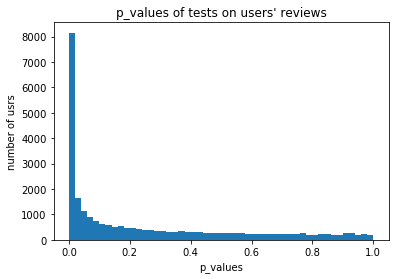

In [95]:
plt.hist(p_values,bins=50)
plt.title('p_values of tests on users\' reviews')
plt.xlabel('p_values')
plt.ylabel('number of usrs')

In [96]:
df_user_wtest1.user_class.value_counts()

0    15928
1    10423
Name: user_class, dtype: int64

In [97]:
8000/(15928+10423)

0.3035937915069637

## handle users with fewer than 20 reviews

In [7]:
#for users with fewer than 20 reviews
user_wtest2_stars=[]
user_wtest2_cumrating=[]
df_user_wtest2=df_user_wtest[df_user_wtest['review_count']<20]
df_user_wtest2=df_user_wtest2.reset_index()
del df_user_wtest2['index']
user_wtest2_stars=list(itertools.chain.from_iterable(df_user_wtest2.stars))
user_wtest2_cumrating=list(itertools.chain.from_iterable(df_user_wtest2.cum_rating))

In [10]:
#all reviews of users with fewer than 20 reviews
sp.wilcoxon(user_wtest2_stars,user_wtest2_cumrating)

WilcoxonResult(statistic=1060871623070.0, pvalue=4.150446411232447e-115)

In [8]:
df_rating_l20=df_rating_1[df_rating_1.user_id.isin(df_user_wtest2.user_id)]

In [46]:
df_rating_l20

user_id  delta        date  stars  cumcount  \
115      ---94vtJ_5o_nikEs6hUjg    0.0  2016-08-17    5.0         5   
116      ---PLwSf5gKdIoVnyRHgBA   -1.0  2016-06-12    3.0       408   
117      ---cu1hq55BP9DWVXXKHZg   -0.5  2014-11-19    4.0        10   
118      ---cu1hq55BP9DWVXXKHZg   -3.5  2014-11-20    1.0        27   
119      ---cu1hq55BP9DWVXXKHZg   -1.0  2014-11-22    1.0       366   
120      ---dYLVmK-neeg2vtsTjWg   -2.5  2017-01-17    1.0        86   
121      ---fhiwiwBYrvqhpXgcWDQ   -1.0  2013-05-01    1.0       105   
123      --0WZ5gklOfbUIodJuKfaQ    0.5  2016-08-26    5.0       160   
124      --0kuuLmuYBe3Rmu0Iycww    1.0  2013-08-26    5.0        10   
125      --0kuuLmuYBe3Rmu0Iycww   -1.5  2013-09-06    1.0         5   
126      --0kuuLmuYBe3Rmu0Iycww    1.0  2013-09-12    4.0        16   
127      --0kuuLmuYBe3Rmu0Iycww    1.0  2013-10-03    4.0         8   
128      --0kuuLmuYBe3Rmu0Iycww   -2.0  2013-11-11    2.0        61   
129      --0kuuLmuYBe3Rmu0Iycww    2.0  2013-12-08    4.0         3   
130      --0kuuLmuYBe3Rmu0Iycww   -2.5  2014-01-27    1.0        34   
131      --0kuuLmuYBe3Rmu0Iycww    0.5  2014-02-01    4.0        61   
132      --0kuuLmuYBe3Rmu0Iycww   -0.5  2014-02-08    4.0         5   
133      --0kuuLmuYBe3Rmu0Iycww    0.5  2014-02-08    4.0        15   
134      --0kuuLmuYBe3Rmu0Iycww    1.0  2014-03-29    5.0        19   
135      --0kuuLmuYBe3Rmu0Iycww   -2.0  2014-04-21    2.0        23   
136      --0sXNBv6IizZXuV-nl0Aw    0.5  2016-03-12    5.0        90   
137      --104qdWvE99vaoIsj9ZJQ   -2.5  2016-07-16    1.0       322   
138      --104qdWvE99vaoIsj9ZJQ    2.0  2016-08-01    5.0         7   
139      --104qdWvE99vaoIsj9ZJQ   -2.0  2016-09-11    1.0        40   
140      --1KT1G4EybSUBEcWkS-6w    0.0  2012-11-27    1.0         5   
141      --1av6NdbEbMiuBr7Aup9A    1.0  2016-03-06    5.0        75   
142      --1av6NdbEbMiuBr7Aup9A    1.5  2016-03-16    5.0        32   
143      --1av6NdbEbMiuBr7Aup9A    0.5  2016-04-09    5.0        92   
144      --1av6NdbEbMiuBr7Aup9A   -1.5  2016-06-12    1.0         4   
145      --1av6NdbEbMiuBr7Aup9A    0.0  2016-11-05    5.0       271   
...                         ...    ...         ...    ...       ...   
4153114  zzudnwbJ_W0wUl21WO-DNg    0.5  2009-11-13    5.0         2   
4153116  zzudnwbJ_W0wUl21WO-DNg    1.0  2009-12-23    5.0         7   
4153117  zzvJmnQh_LVTrmx6X3MJrg   -1.5  2016-11-02    1.0      2419   
4153118  zzvV3l9IqTRX7Db8nxThbA   -2.0  2013-09-02    2.0        56   
4153119  zzvbRlOYsyOrpuiOrloRew    1.0  2016-04-20    5.0        49   
4153120  zzvm_VD3HjU6RMx8zq7g1g    1.0  2015-12-28    5.0       124   
4153121  zzwP9jh8_W0RhemlxCv_1g    1.5  2010-10-10    5.0       941   
4153122  zzwTJAgONYCTeJia4te47g   -0.5  2016-08-11    3.0       141   
4153123  zzwTJAgONYCTeJia4te47g   -1.5  2016-08-11    3.0        59   
4153124  zzwTJAgONYCTeJia4te47g   -1.0  2016-08-13    2.0        62   
4153125  zzxZoMmjbUjXcWZzrE3PIw   -2.0  2013-11-07    2.0        47   
4153126  zzxZoMmjbUjXcWZzrE3PIw   -3.5  2014-02-25    1.0        43   
4153127  zzxZoMmjbUjXcWZzrE3PIw   -3.0  2015-01-15    1.0        32   
4153128  zzxZoMmjbUjXcWZzrE3PIw   -1.0  2015-05-14    2.0        42   
4153129  zzxZoMmjbUjXcWZzrE3PIw   -0.5  2015-11-06    3.0       344   
4153130  zzxbZgRaVD66oLRiF5LCxA   -0.5  2014-03-20    2.0      1711   
4153131  zzxjh12k3PNekFGTtW1h_w    0.5  2014-05-29    5.0        10   
4153132  zzxtlSq9uFbgCeOzLtuglA   -0.5  2015-10-09    4.0        38   
4153133  zzy9H_45XLydmYZ2P_Ve_g    0.0  2014-08-27    5.0         2   
4153134  zzyLd6p8pcNdkd4Hrv08bw   -1.0  2014-08-13    3.0      1755   
4153135  zzyx5LodXOXGyh-c7ox_Mg   -1.5  2016-07-21    3.0         3   
4153136  zzyzP--p98zZtx359NvgGA   -0.5  2014-04-06    3.0       101   
4153137  zzzAgDDWe4PTnJuwhi3XQQ    0.5  2016-09-27    4.0       581   
4153138  zzzAgDDWe4PTnJuwhi3XQQ    1.5  2016-09-27    5.0       189   
4153139  zzzTkKLFo9CaeZnfO4TvzA   -2.0  2014-08-

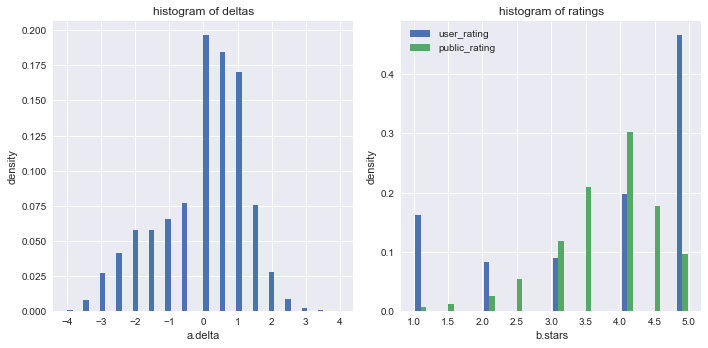

In [28]:
import seaborn
weights = np.ones_like(df_rating_l20.delta)/float(len(df_rating_l20.delta))
weights2 = np.ones_like(df_rating_l20.stars)/float(len(df_rating_l20.stars))
weights3 = np.ones_like(df_rating_l20.cum_rating)/float(len(df_rating_l20.cum_rating))
w=[weights2,weights3]
fig=plt.figure(figsize=[10,5])
ax1=fig.add_subplot(121)
ax1.hist(df_rating_l20.delta, weights=weights,bins=50)
plt.title('histogram of deltas')
plt.xlabel('a.delta')
plt.ylabel('density')
ax2=fig.add_subplot(122)
labels=['user_rating','public_rating']
ax2.hist([df_rating_l20.stars,df_rating_l20.cum_rating],weights=w,bins=20,label=labels)
plt.title('histogram of ratings')
plt.xlabel('b.stars')
plt.ylabel('density')
plt.legend()
plt.tight_layout()

In [45]:
sum(n[0][0:24])

0.33398020600524059

In [20]:
df_rating_l20['delta']=df_rating_l20.stars-df_rating_l20.cum_rating

/Users/stevezhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Try paired t test

In [22]:
len(df_user_wtest1[df_user_wtest1.user_class!=df_user_wtest1.pt_user_class])/len(df_user_wtest1)

0.04011232970285758

In [13]:
sp.ttest_rel(df_user_wtest1.stars[3],df_user_wtest1.cum_rating[3])

Ttest_relResult(statistic=-0.49999999999999994, pvalue=0.62128067439713086)

In [16]:
def pttest(row):
    if sp.ttest_rel(row.stars,row.cum_rating)[1]<0.05:
        return 1
    else:
        return 0

In [17]:
#for users with more than 20 reviews
pttest_user_class=[]
#p_values=[]
pttest_user_class.append(df_user_wtest1.apply(lambda row:pttest(row),axis=1))
#p_values.append(df_user_wtest1.apply(lambda row:pttest(row)[1],axis=1))
df_user_wtest1['pt_user_class']=pttest_user_class[0]

In [34]:
def normtest(row):
    if sp.normaltest(row.cum_rating)[1]<0.1:
        return 1
    else:
        return 0

In [35]:
#for users with more than 20 reviews
normtest_stars=[]
normtest_cumstars=[]
#p_values=[]
normtest_cumstars.append(df_user_wtest1.apply(lambda row:normtest(row),axis=1))
#p_values.append(df_user_wtest1.apply(lambda row:pttest(row)[1],axis=1))
#df_user_wtest1['pt_user_class']=pttest_user_class[0]

(array([  8437.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17914.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

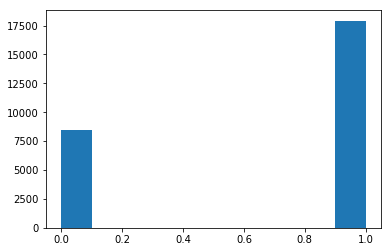

In [33]:
plt.hist(normtest_stars)

(array([ 16251.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  10100.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

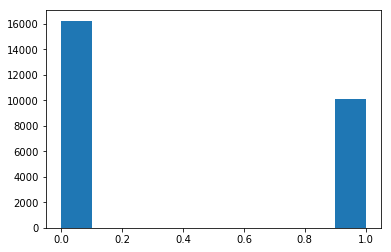

In [36]:
plt.hist(normtest_cumstars)

In [25]:
sp.normaltest(df_user_wtest1.stars[3])

NormaltestResult(statistic=2.2810190831200181, pvalue=0.31965610224367857)

In [33]:
df_user_wtest1.to_csv('wicoxon classification.csv')